# Data Analysis

## Pandas - Datasets

Pandas is a high-level data manipulation tool. Its key data structure is called a DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

[This](https://pandas.pydata.org/pandas-docs/stable/index.html) is a link to the Pandas documentation.

## Imports

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading a dataset from a csv (in DSX)

Auto-generate code by ... 

If you were working in your own local environment, uncomment the cell below and run it.

In [20]:
simple_df = pd.read_csv('simple data.csv')
print(simple_df.head())

   group   samples    double  measured
0      1  0.899117  1.798234  1.822831
1      1  0.642620  1.285241  1.358457
2      1  0.799750  1.599499  1.560856
3      1  0.354839  0.709678  0.752218
4      1  0.327910  0.655821  0.615724


In [37]:
group_dict = {"group": [1, 2],
       "name": ['Group 1', 'Group 2']}

group_name_df = pd.DataFrame(group_dict)
group_name_df.head()

,group,name
0,1,Group 1
1,2,Group 2


#### Creating a column

We can refer to a particular column using dataframe['column name']. This method of indexing is consistent with indexing lists and dictionaries. 

Using dataframe['column name'] on the left side of the "=" creates a new column or overwrite a column. Using dataframe['column name'] on the right side of the "=" allows you to refer to an existing column.

In [21]:
simple_df['half'] = simple_df['samples'] <= 0.5
simple_df['samples+10'] = simple_df['samples'] + 10


simple_df.head()

,group,samples,double,measured,half,samples+10
0,1,0.899117,1.798234,1.822831,False,10.899117
1,1,0.642620,1.285241,1.358457,False,10.642620
2,1,0.799750,1.599499,1.560856,False,10.799750
3,1,0.354839,0.709678,0.752218,True,10.354839
4,1,0.327910,0.655821,0.615724,True,10.327910


#### Selecting data

Similar to referring to a particular column, you can refer to a list of columns. Generally you can do this with dataframe[[list of column names]]. This can be used to "keep" only the list of columns.

If you would rather just drop a smaller set of columns that's also possible. 

If you want to filter out rows you can do that using .loc[] i.e. dataframe.loc[condition]. You can combine multiple conditions together using & and | operators. You can filter columns and rows in the same operation using the .loc[] i.e. dataframe.loc[condition, [list of columns]].

In [32]:
simple_test_df = simple_df[['group', 'half', 'samples', 'measured']]
simple_test_df.head()

,group,half,samples,measured
0,1,False,0.899117,1.822831
1,1,False,0.642620,1.358457
2,1,False,0.799750,1.560856
3,1,True,0.354839,0.752218
4,1,True,0.327910,0.615724


In [33]:
simple_10_df = simple_df.drop(['samples', 'double', 'half'], axis=1)
simple_10_df.head()

,group,measured,samples+10
0,1,1.822831,10.899117
1,1,1.358457,10.642620
2,1,1.560856,10.799750
3,1,0.752218,10.354839
4,1,0.615724,10.327910


In [34]:
simple_half_df = simple_df.loc[simple_df['half'] == True]
simple_half_df.head()

,group,samples,double,measured,half,samples+10
3,1,0.354839,0.709678,0.752218,True,10.354839
4,1,0.327910,0.655821,0.615724,True,10.327910
6,1,0.164119,0.328237,0.304313,True,10.164119
9,1,0.377106,0.754213,0.687244,True,10.377106
10,1,0.037807,0.075615,0.081660,True,10.037807


In [35]:
simple_test_half_df = simple_df.loc[simple_df['half'] == True, ['group', 'samples', 'measured']]
simple_test_half_df.head()

,group,samples,measured
3,1,0.354839,0.752218
4,1,0.327910,0.615724
6,1,0.164119,0.304313
9,1,0.377106,0.687244
10,1,0.037807,0.081660


#### Joining a dataset

The basic strategy for joining datasets is to set the index of the datasets to same columns. You can then join two dataframes using the join function. Using the optional parameters of the join function you can choose between outer, left, right, and inner joins. If the index was already set you could just use:

```python
joined_df = left_df.join(right_df)
```

In [38]:
join_df = simple_test_df.join(group_name_df.set_index('group'), on='group')
join_df.head()

,group,half,samples,measured,name
0,1,False,0.899117,1.822831,Group 1
1,1,False,0.642620,1.358457,Group 1
2,1,False,0.799750,1.560856,Group 1
3,1,True,0.354839,0.752218,Group 1
4,1,True,0.327910,0.615724,Group 1


#### Group-by and statistics

The basic strategy for aggregating and getting group statistics is to use the groupby function by passing it a list of the variables that will make up the group.

You can then call various functions such as sum(), mean(), etc. that will will calculate the aggregate for the group. Alternatively you can use the agg() function by passing it a dictionary where the keys are the variables you want aggregate statistics of, and the values are a string or list of strings of the different functions you want to aggregate with.

The groupby() function's level= parameter is useful for merging a more detailed value to a more aggregated value and calculating things based on that.

In [31]:
group_df = join_df.groupby(['name']).mean()
group_df.head()

,group,samples,measured
name,,,
Group 1,1,0.439843,0.871023
Group 2,2,0.544206,1.205506


In [41]:
group_df2 = join_df.groupby(['group', 'half']).agg({'samples': 'mean', 'measured': ['mean', 'min', 'max', 'std']})
group_df2.head()

samples  measured                              
                 mean      mean       min       max       std
group half                                                   
1     False  0.775310  1.548413  0.999779  1.994720  0.288288
      True   0.203491  0.393771 -0.056920  0.912984  0.283018
2     False  0.772493  1.707720  1.097274  2.188951  0.353360
      True   0.220185  0.492687 -0.077870  1.158557  0.388527

#### Pivoting and transposing data

In [44]:
pivot_df =  join_df.groupby(['group', 'half']).agg({'measured': 'mean'}).reset_index()


pivot_df = pivot_df.pivot(index='group', columns='half', values='measured')
pivot_df.head()

half,False,True
group,,
1,1.548413,0.393771
2,1.707720,0.492687


### Seaborn for plotting

#### Bar graphs

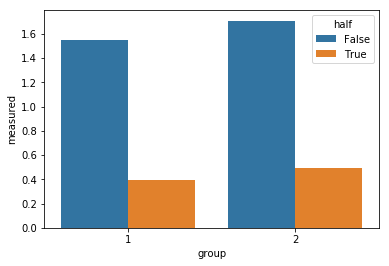

In [49]:
bar_graph_df = join_df.groupby(['group', 'half']).mean().reset_index()

ax = sns.barplot(x="group", 
                 y="measured", 
                 hue='half', 
                 data=bar_graph_df)
plt.show()

#### Scatter plots

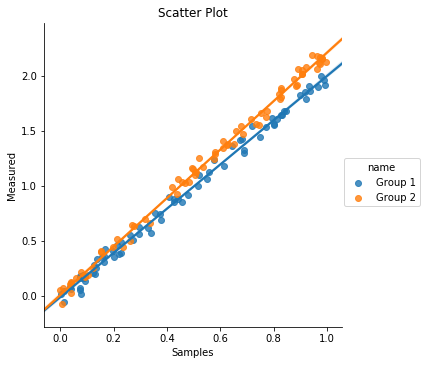

In [53]:
sns.lmplot('samples', # Horizontal axis
           'measured', # Vertical axis
           data=join_df, # Data source
           fit_reg=True, # Don't fix a regression line
           hue='name') # Set color

# Set title
plt.title('Scatter Plot')

# Set x-axis label
plt.xlabel('Samples')

# Set y-axis label
plt.ylabel('Measured')

plt.show()

#### Pair-plots

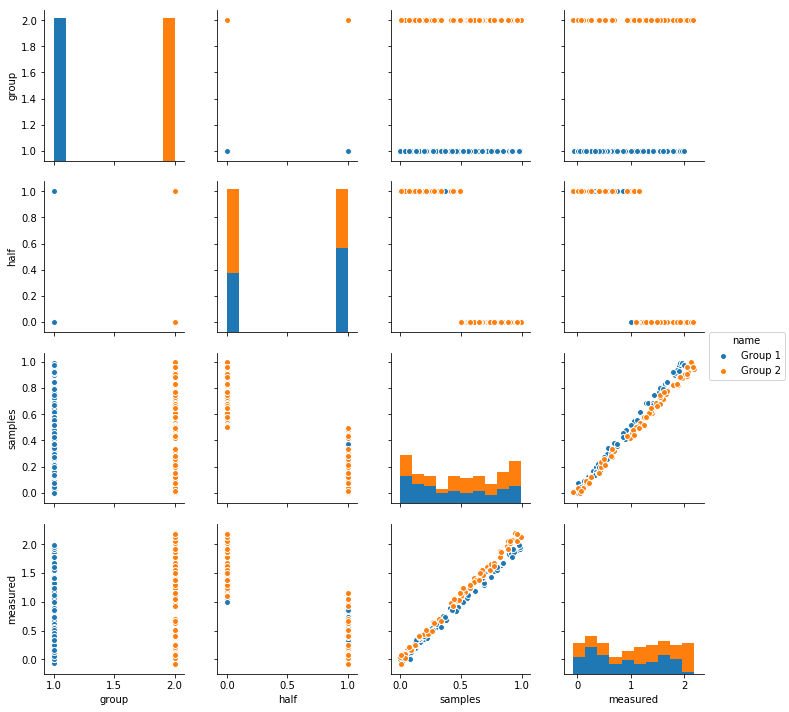

In [54]:
sns.pairplot(join_df, hue="name")
plt.show()

## Machine Learning


### Scikit-learn for machine learning

#### Manipulating data

In [147]:
from sklearn.model_selection import train_test_split

X = house_df[['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']].values
y = house_df[['in_sf']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print(X_train[:5, :]
print(y_train[:5]

[[  4.00000000e+00   2.00000000e+00   6.89000000e+05   1.95100000e+03
    1.47300000e+03   4.68000000e+02   2.10000000e+01]
 [  4.00000000e+00   2.50000000e+00   6.99900000e+05   1.98200000e+03
    1.75200000e+03   3.99000000e+02   1.40000000e+02]
 [  3.00000000e+00   2.00000000e+00   1.19500000e+06   1.90700000e+03
    1.39600000e+03   8.56000000e+02   3.30000000e+01]
 [  0.00000000e+00   1.00000000e+00   7.75000000e+05   2.00900000e+03
    5.46000000e+02   1.41900000e+03   6.00000000e+00]
 [  2.00000000e+00   2.00000000e+00   1.99500000e+06   1.99600000e+03
    1.04400000e+03   1.91100000e+03   1.00000000e+01]]
[[1]
 [1]
 [1]
 [0]
 [0]]


#### Supervised learning - classification with Decision Trees

In [148]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
train_accuracy = 1.0 * sum(y_train_pred == y_train.reshape(-1)) / y_train.size
print(train_accuracy

y_pred = clf.predict(X_test)
test_accuracy = 1.0 * sum(y_pred == y_test.reshape(-1)) / y_test.size
print(test_accuracy

1.0
0.898648648649


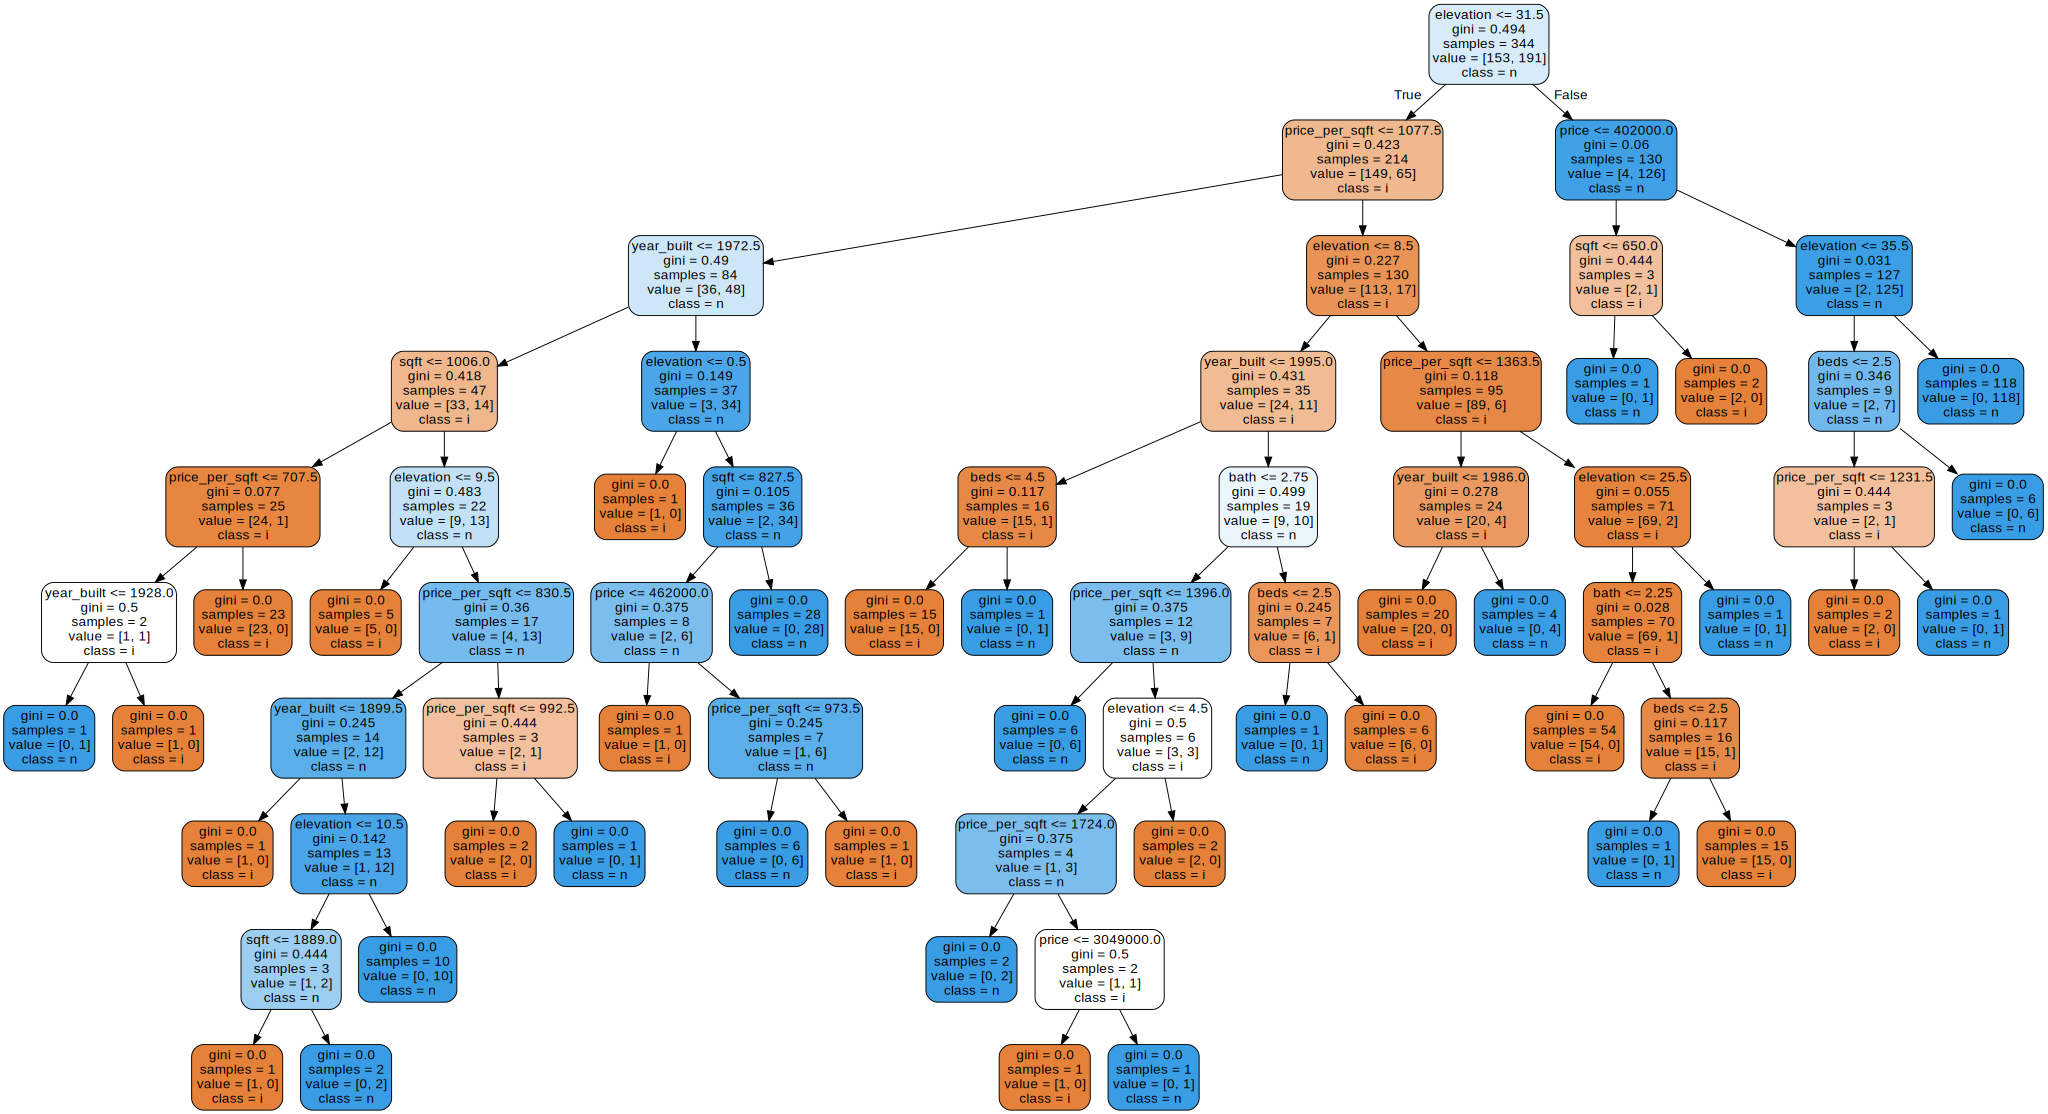

In [149]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation'],  
                         class_names='in_sf',  
                         filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph

In [150]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 5)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
train_accuracy = 1.0 * sum(y_train_pred == y_train.reshape(-1)) / y_train.size
print(train_accuracy

y_pred = clf.predict(X_test)
test_accuracy = 1.0 * sum(y_pred == y_test.reshape(-1)) / y_test.size
print(test_accuracy

0.94476744186
0.885135135135


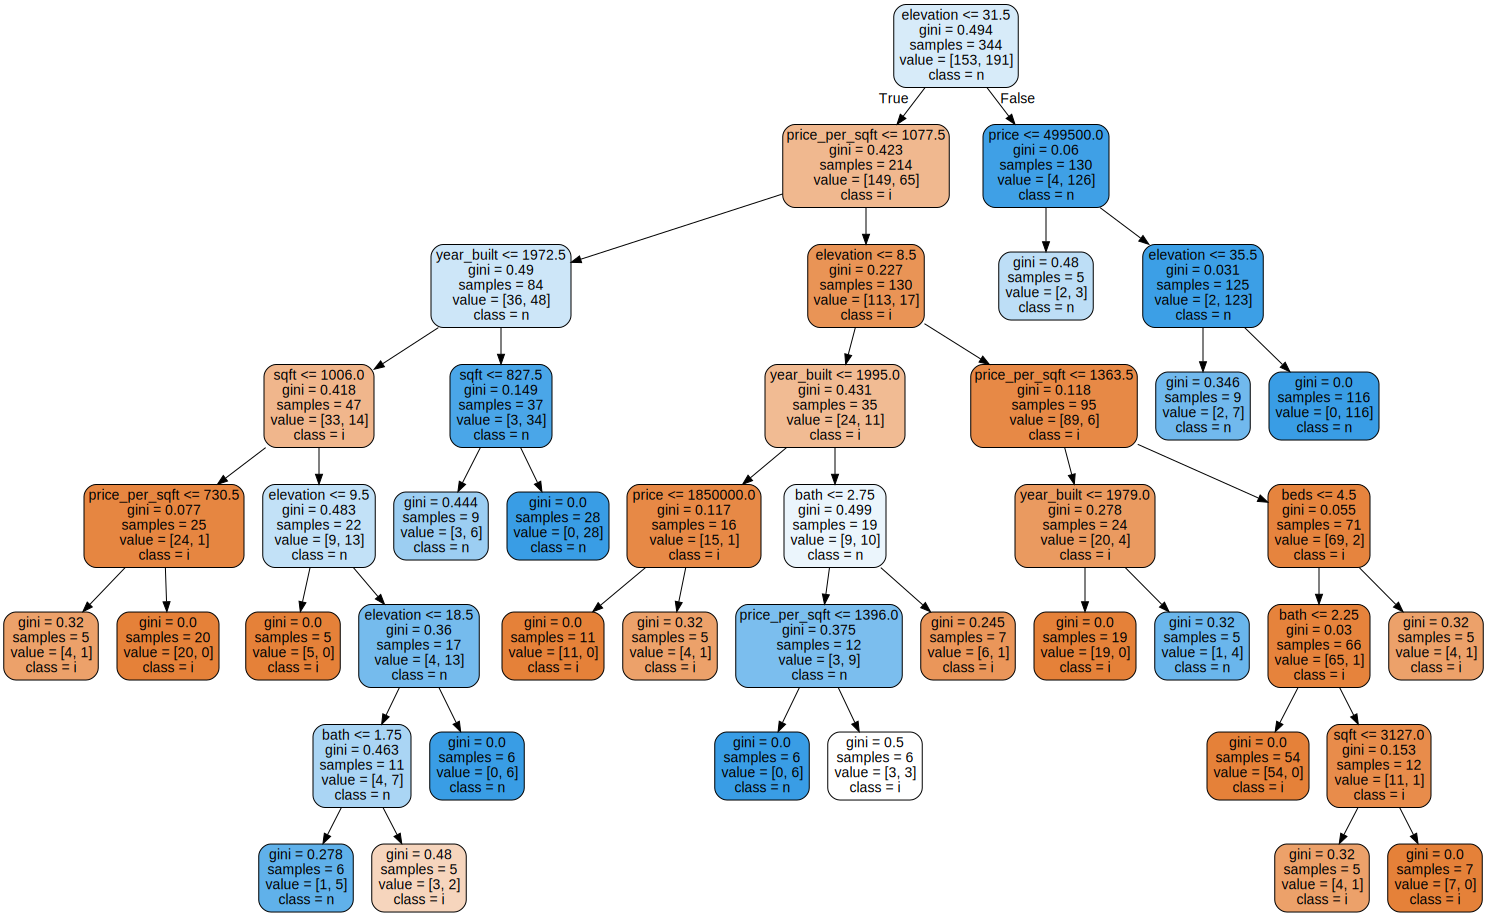

In [151]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation'],  
                         class_names='in_sf',  
                         filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph

### Supervised learning - classification with various other classifiers

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train.reshape(-1))
y_train_pred = knn.predict(X_train)
train_accuracy = 1.0 * sum(y_train_pred == y_train.reshape(-1)) / y_train.size
print("knn train: %f" % train_accuracy

y_pred = knn.predict(X_test)
test_accuracy = 1.0 * sum(y_pred == y_test.reshape(-1)) / y_test.size
print("knn test: %f" % test_accuracy

##############################

rfc = RandomForestClassifier(n_estimators = 50)
rfc = rfc.fit(X_train, y_train.reshape(-1))
y_train_pred = rfc.predict(X_train)
train_accuracy = 1.0 * sum(y_train_pred == y_train.reshape(-1)) / y_train.size
print("random forest train: %f" % train_accuracy

y_pred = rfc.predict(X_test)
test_accuracy = 1.0 * sum(y_pred == y_test.reshape(-1)) / y_test.size
print("random forest test: %f" % test_accuracy

##############################

abc = AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(max_depth = 5), n_estimators=50)
abc = abc.fit(X_train, y_train.reshape(-1))
y_train_pred = abc.predict(X_train)
train_accuracy = 1.0 * sum(y_train_pred == y_train.reshape(-1)) / y_train.size
print("Boosting train: %f" % train_accuracy

y_pred = abc.predict(X_test)
test_accuracy = 1.0 * sum(y_pred == y_test.reshape(-1)) / y_test.size
print("Boosting test: %f" % test_accuracy

knn train: 0.755814
knn test: 0.675676
random forest train: 1.000000
random forest test: 0.912162
Boosting train: 1.000000
Boosting test: 0.918919


### Supervised learning - grid search of hyper parameters

In [159]:
from sklearn import tree, model_selection

dt = tree.DecisionTreeClassifier()
parameters = {'criterion': ('gini', 'entropy'), 'min_samples_leaf':[1, 2, 3, 5, 10], 'max_depth': [3, 5, None]}
clf = model_selection.GridSearchCV(dt, parameters, cv=5)
clf = clf.fit(X, y.reshape(-1))
print(pd.DataFrame(clf.cv_results_)[['rank_test_score', 'mean_test_score', 'mean_train_score', 'params']]

    rank_test_score  mean_test_score  mean_train_score  \
0                17         0.843496          0.896344   
1                17         0.843496          0.895838   
2                17         0.843496          0.895837   
3                17         0.843496          0.895328   
4                17         0.843496          0.889227   
5                16         0.845528          0.958329   
6                12         0.847561          0.953257   
7                 4         0.861789          0.949192   
8                 1         0.863821          0.930887   
9                12         0.847561          0.923270   
10               25         0.833333          1.000000   
11               22         0.839431          0.981209   
12               29         0.825203          0.967994   
13                8         0.855691          0.938513   
14               12         0.847561          0.923270   
15               27         0.827236          0.893273   
16            